# Network in Network (NiN) - Interactive Notebook
This notebook explains the *Network in Network* (NiN) architecture, implements it in PyTorch, and provides interactive elements for students to experiment with hyperparameters.

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

# Load Flowers-101 dataset (or a substitute if needed)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

trainset = torchvision.datasets.Flowers102(root='./data', split='train', download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)


100%|██████████| 345M/345M [00:14<00:00, 23.2MB/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 437kB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 9.06MB/s]


## Defining the Network in Network (NiN) Architecture

In [ ]:

# Define Network in Network Model
class NiN(nn.Module):
    def __init__(self, num_classes=102):
        super(NiN, self).__init__()
        self.nin_block1 = self.nin_block(3, 96, kernel_size=11, stride=4, padding=0)
        self.nin_block2 = self.nin_block(96, 256, kernel_size=5, stride=1, padding=2)
        self.nin_block3 = self.nin_block(256, 384, kernel_size=3, stride=1, padding=1)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.classifier = nn.Conv2d(384, num_classes, kernel_size=1)

    def nin_block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=1),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.nin_block1(x)
        x = self.nin_block2(x)
        x = self.nin_block3(x)
        x = self.global_avg_pool(x)
        x = self.classifier(x)
        return x.view(x.size(0), -1)


## Training Configuration and Interactive Learning Rate Adjustment

In [ ]:

# Instantiate model, loss, and optimizer
model = NiN(num_classes=102)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Interactive function for adjusting learning rate
def train_model(lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    print(f"Training model with learning rate: {lr}")
    # Training loop placeholder (for students to complete)

# Create an interactive slider
interact(train_model, lr=FloatSlider(min=0.0001, max=0.01, step=0.0001, value=0.001))


interactive(children=(FloatSlider(value=0.001, description='lr', max=0.01, min=0.0001, step=0.0001), Output())…

<function __main__.train_model(lr=0.001)>

## Visualizing Feature Maps

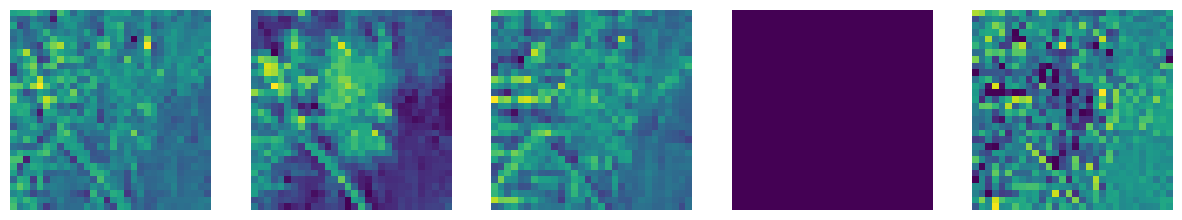

In [21]:

# Visualization function for feature maps
def visualize_feature_maps():
    images, _ = next(iter(trainloader))
    model.eval()
    with torch.no_grad():
        activations = model.nin_block1(images[:1])  # Get activations from first NiN block
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        axes[i].imshow(activations[0, i].cpu().numpy(), cmap='viridis')
        axes[i].axis('off')
    plt.show()

visualize_feature_maps()
